### Graph/Network Mining

In this notebook, we will use Facebook combined ego networks dataset. The dataset description is [here](https://snap.stanford.edu/data/egonets-Facebook.html). 

This network contains the aggregated network of ten individuals’ Facebook friends list. There are two columns in this file representing the nodes, and each row represents a link. 

Data Location: /dsa/data/DSA-8410/graph/facebook_combined.txt

### Environment Setup

In [1]:
import sys
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
from networkx.algorithms.community.lukes import lukes_partitioning
import pandas as pd
%matplotlib inline

In [19]:
df = pd.read_csv('/dsa/data/DSA-8410/graph/facebook_combined.txt', sep=" ", header=None)

In [20]:
print(df.head())
print(df.columns)

   0  1
0  0  1
1  0  2
2  0  3
3  0  4
4  0  5
Int64Index([0, 1], dtype='int64')


### T1. Create the network

In [24]:
g = nx.Graph()

for indx, row in df.iterrows():
    g.add_edge(row[0], row[1])

### T2: Show the number of eges and nodes

In [25]:
g.number_of_nodes()

4039

In [26]:
g.number_of_edges()

88234

### T3. Show min, max, and avg degress for this network

In [27]:
deg = g.degree()

In [28]:
min(deg, key=lambda x: x[1])

(11, 1)

In [29]:
max(deg, key=lambda x: x[1])

(107, 1045)

In [30]:
avg_degree = sum([d for n, d in deg]) / g.number_of_nodes()
avg_degree

43.69101262688784

### T4. Show a degree distrbution plot


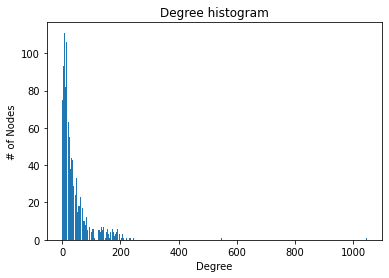

In [31]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes");

### T5. Print top-10 nodes in terms of high degree

In [35]:
deg = g.degree()

sorted_degree = sorted(deg, key=lambda x: x[1], reverse=True)

print(sorted_degree[:10])

[(107, 1045), (1684, 792), (1912, 755), (3437, 547), (0, 347), (2543, 294), (2347, 291), (1888, 254), (1800, 245), (1663, 235)]


# Save your notebook, then `File > Close and Halt`